In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import seaborn as sns
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.svm import SVC
import os
#for dirname, _, filenames in os.walk('C:\Users\91999\OneDrive\Desktop'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

In [3]:
df=pd.read_csv("emotion-labels-train.csv")
df.columns=["text", "emotion"]
df

,text,emotion
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy
...,...,...
3608,@VivienLloyd Thank you so much! Just home - st...,sadness
3609,Just put the winter duvet on ☃️❄️🌬☔️,sadness
3610,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness
3611,@BluesfestByron second artist announcement loo...,sadness


In [4]:
def load_dataset(filepath):
    df=pd.read_csv(filepath)
    df.columns=["text", "emotion"]
    return df

In [5]:
path=("emotion-labels-train.csv")
path1=("emotion-labels-val.csv")
path2=("emotion-labels-test.csv")

train_data = load_dataset(path)
validation_data = load_dataset(path1)
test_data = load_dataset(path2)

In [6]:
df = pd.concat([train_data, validation_data, test_data])
df.head()

,text,emotion
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [6]:
df.shape

(7102, 2)

# EDA


In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
lemmatizer = nltk.stem.WordNetLemmatizer()
stopwords = set(nltk.corpus.stopwords.words("english"))
stemmer = nltk.stem.snowball.SnowballStemmer("english")

In [8]:
df.isnull().sum()

text       0
emotion    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7102 entries, 0 to 3141
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     7102 non-null   object
 1   emotion  7102 non-null   object
dtypes: object(2)
memory usage: 166.5+ KB


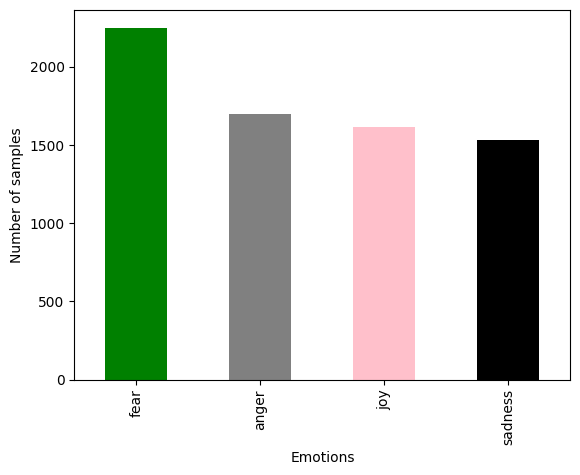

In [11]:
df['emotion'].value_counts().plot(kind='bar', color=['green', 'gray', 'pink', 'black', 'red', 'orange'])
plt.xlabel('Emotions')
plt.ylabel('Number of samples')
plt.show()

# Text Preprocessing


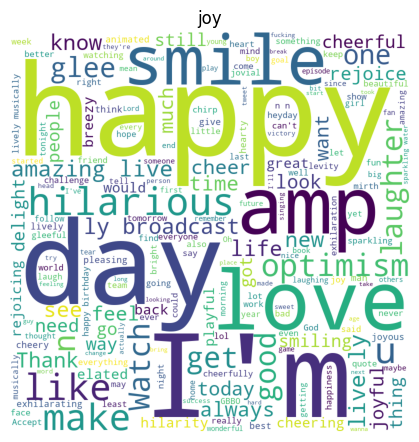

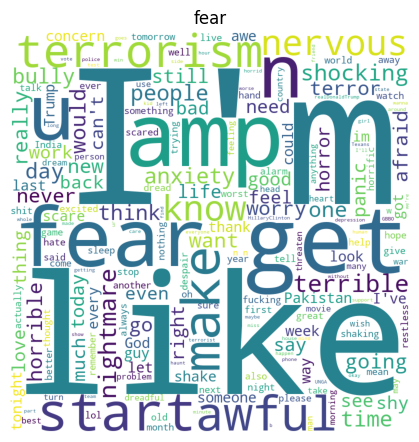

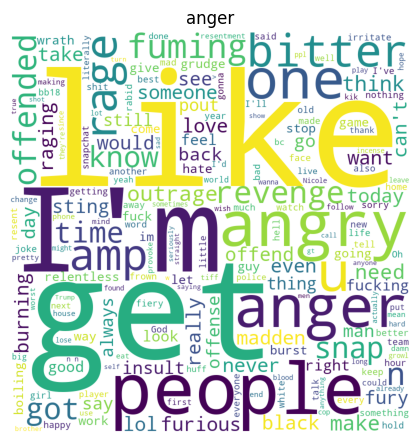

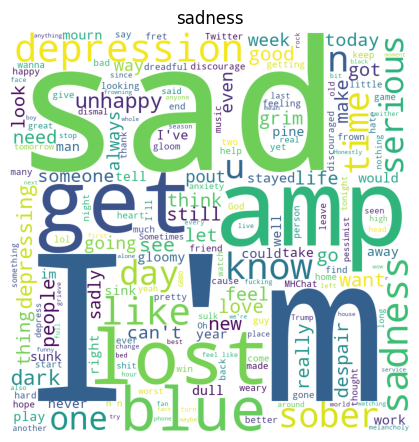

In [12]:
emotions = df['emotion'].unique()
for emotion in emotions:
    text = " ".join(df[df['emotion'] == emotion]['text'])
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(text)
    plt.figure(figsize = (4, 4), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(emotion)
    plt.show()

# Modeling

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["emotion"], test_size=0.2, random_state=42)

In [15]:
X_test

2135    Imagine celtic burst the net wae every attempt...
487                   @_wednesdaychild I need to cheer up
717     @riinkanei he's a horrible person and now i ga...
872     @annafifield @washingtonpost all hands on deck...
183     Gahh...BT, in queue for 30 minutes.. Now put t...
                              ...                        
2562    When mine pass, I know I'll be inconsolable &a...
216     @RevTrevK @Wolfman93011 @Daraidernation @EROCK...
1649    @Gibberman10 @ScottHoward42 any of y'all remem...
859     I thought I wouldn't have to deal with that fi...
1720    As much as I want a normal little life.. It wo...
Name: text, Length: 1421, dtype: object

In [14]:
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

# Random Forest

In [ ]:
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train_cv, y_train)
    y_pred = rf_classifier.predict(X_test_cv)
    score_percentage = round(rf_classifier.score(X_test_cv, y_test) * 100,2)
    rf_scores.append(score_percentage)

In [18]:
print(rf_scores)

[81.21, 85.43, 86.07]


In [19]:
from matplotlib.cm import rainbow

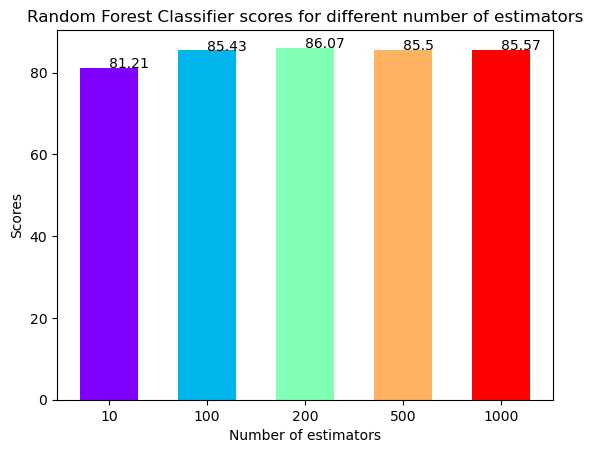

In [ ]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.6)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')
plt.savefig("Random_Forest.png",bbox_inches="tight",pad_inches=0.1,
            edgecolor="red")

In [20]:
report_rf = classification_report(y_test, y_pred)
print("Classification report of Random Forest classifier:\n", report_rf)

Classification report of Random Forest classifier:
               precision    recall  f1-score   support

       anger       0.93      0.82      0.87       327
        fear       0.80      0.93      0.86       455
         joy       0.97      0.91      0.94       323
     sadness       0.80      0.75      0.77       316

    accuracy                           0.86      1421
   macro avg       0.87      0.85      0.86      1421
weighted avg       0.87      0.86      0.86      1421



In [ ]:
# Take user input for prediction
user_input = input("Enter a text string: ")

# Transform the user input using the same CountVectorizer
user_input_cv = cv.transform([user_input])

# Predict the emotion
predicted_emotion = rf_classifier.predict(user_input_cv)

# Display the predicted emotion
print(f"Predicted Emotion: {predicted_emotion[0]}")

In [22]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i],random_state=100)
    svc_classifier.fit(X_train_cv, y_train)
    y_pred = svc_classifier.predict(X_test_cv)
    score_percentage=round(svc_classifier.score(X_test_cv, y_test) * 100, 2)
    svc_scores.append(score_percentage)

In [23]:
from matplotlib.cm import rainbow

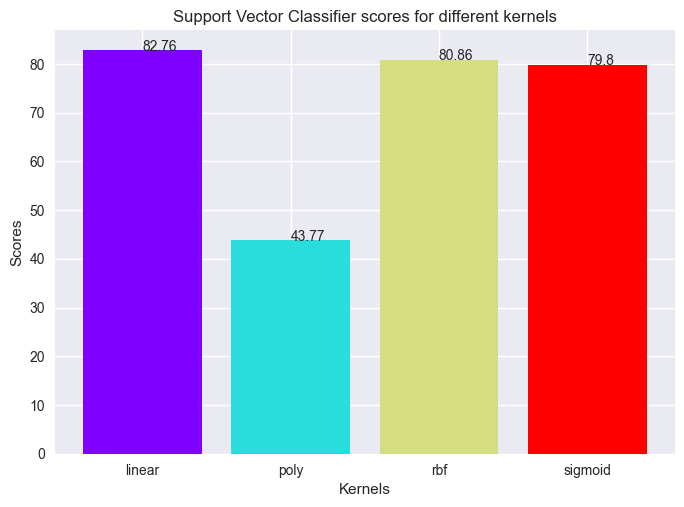

In [24]:
plt.style.use("seaborn")
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
plt.savefig("SVC.png",bbox_inches="tight",pad_inches=1,
            edgecolor="red")


In [25]:
report_svm = classification_report(y_test, y_pred)
print("Classification report of Linear SVM:\n", report_svm)

Classification report of Linear SVM:
               precision    recall  f1-score   support

       anger       0.77      0.77      0.77       327
        fear       0.76      0.86      0.81       455
         joy       0.92      0.80      0.86       323
     sadness       0.78      0.72      0.75       316

    accuracy                           0.80      1421
   macro avg       0.81      0.79      0.80      1421
weighted avg       0.80      0.80      0.80      1421



In [26]:
# Take user input for prediction
user_input = input("Enter a text string: ")

# Transform the user input using the same CountVectorizer
user_input_cv = cv.transform([user_input])

# Predict the emotion
predicted_emotion = svc_classifier.predict(user_input_cv)

# Display the predicted emotion
print(f"Predicted Emotion: {predicted_emotion[0]}")

Predicted Emotion: fear


In [17]:
lr = LogisticRegression(max_iter=1000, random_state=100)
lr.fit(X_train_cv, y_train)

LogisticRegression(max_iter=1000, random_state=100)

In [18]:
y_pred_lr = lr.predict(X_test_cv)

In [19]:
report_lr = classification_report(y_test, y_pred_lr)
print("Classification report of Logistic Regression (Multi-Class):\n", report_lr)

Classification report of Logistic Regression (Multi-Class):
               precision    recall  f1-score   support

       anger       0.83      0.83      0.83       327
        fear       0.82      0.89      0.86       455
         joy       0.94      0.89      0.91       323
     sadness       0.79      0.74      0.77       316

    accuracy                           0.84      1421
   macro avg       0.85      0.84      0.84      1421
weighted avg       0.84      0.84      0.84      1421

